In [5]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.


#For creating the model that train the data from scratch, we need:
1. Layer
2. Sequential Class
3. Epoch
4. Batch
5. Datae

#NaiveDense Layer

In [6]:
import tensorflow as tf
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval = 0, maxval = 1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W)+self.b)

    @property 
    def weights(self):
        return [self.W, self.b]

#Sequence Class to chain these dense layers 

In [7]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

#We also need a batch generator to generate the batch of data to process at a time

In [8]:
import math
class BatchGenerator:
    def __init__(self, images, labels, batch_size = 128):
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index: self.index + self.batch_size]
        labels = self.labels[self.index: self.index + self.batch_size]
        self.index+= self.batch_size
        return images, labels

#One-Training Step
When we are training, we must calculate the gradient of the loss with respect to the weight and update the value of weight accordingly

In [9]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [10]:
learning_rate = 1e-3
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g* learning_rate)

In [11]:
def fit(model, images, labels, epochs, batch_size = 128):
    for e in range(epochs):
        print(f"Epoch {e}")
        batch_generator = BatchGenerator(images, labels, batch_size)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"Loss at Batch {batch_counter}: {loss:.2f}")
        

#Sequential Class for the layers

In [12]:

model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

assert len(model.weights) == 4

In [13]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


#Preprocessing
train_images = train_images.reshape((60000, 28*28))

train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

#Fitting the model
fit(model, train_images, train_labels, epochs = 10, batch_size = 128)


Epoch 0
Loss at Batch 0: 5.92
Loss at Batch 100: 2.24
Loss at Batch 200: 2.20
Loss at Batch 300: 2.07
Loss at Batch 400: 2.19
Epoch 1
Loss at Batch 0: 1.88
Loss at Batch 100: 1.89
Loss at Batch 200: 1.83
Loss at Batch 300: 1.70
Loss at Batch 400: 1.81
Epoch 2
Loss at Batch 0: 1.56
Loss at Batch 100: 1.59
Loss at Batch 200: 1.51
Loss at Batch 300: 1.41
Loss at Batch 400: 1.49
Epoch 3
Loss at Batch 0: 1.30
Loss at Batch 100: 1.36
Loss at Batch 200: 1.25
Loss at Batch 300: 1.20
Loss at Batch 400: 1.27
Epoch 4
Loss at Batch 0: 1.11
Loss at Batch 100: 1.18
Loss at Batch 200: 1.05
Loss at Batch 300: 1.04
Loss at Batch 400: 1.10
Epoch 5
Loss at Batch 0: 0.97
Loss at Batch 100: 1.04
Loss at Batch 200: 0.91
Loss at Batch 300: 0.93
Loss at Batch 400: 0.99
Epoch 6
Loss at Batch 0: 0.86
Loss at Batch 100: 0.93
Loss at Batch 200: 0.81
Loss at Batch 300: 0.84
Loss at Batch 400: 0.90
Epoch 7
Loss at Batch 0: 0.78
Loss at Batch 100: 0.84
Loss at Batch 200: 0.73
Loss at Batch 300: 0.77
Loss at Batch 40

Note: you may need to restart the kernel to use updated packages.


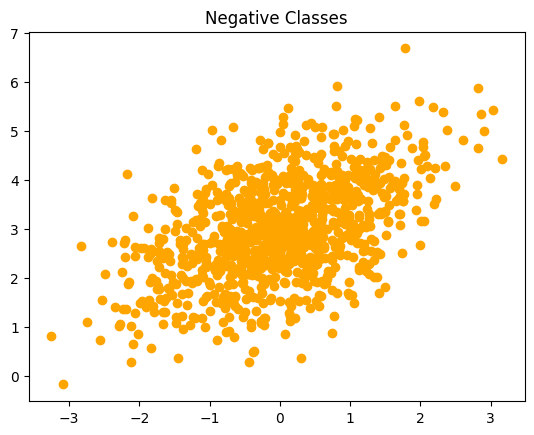

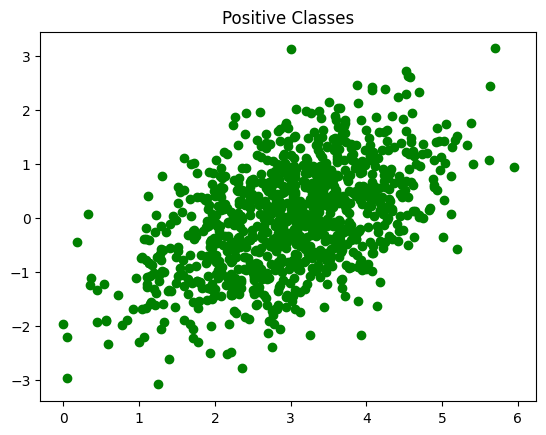

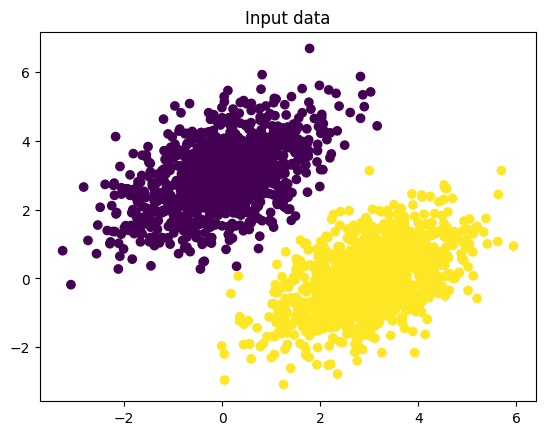

Epoch 0
Loss at Batch 0: 0.70
Epoch 1
Loss at Batch 0: 0.68
Epoch 2
Loss at Batch 0: 0.66
Epoch 3
Loss at Batch 0: 0.65
Epoch 4
Loss at Batch 0: 0.63
Epoch 5
Loss at Batch 0: 0.62
Epoch 6
Loss at Batch 0: 0.61
Epoch 7
Loss at Batch 0: 0.59
Epoch 8
Loss at Batch 0: 0.58
Epoch 9
Loss at Batch 0: 0.57
Epoch 10
Loss at Batch 0: 0.56
Epoch 11
Loss at Batch 0: 0.54
Epoch 12
Loss at Batch 0: 0.53
Epoch 13
Loss at Batch 0: 0.52
Epoch 14
Loss at Batch 0: 0.51
Epoch 15
Loss at Batch 0: 0.50
Epoch 16
Loss at Batch 0: 0.49
Epoch 17
Loss at Batch 0: 0.48
Epoch 18
Loss at Batch 0: 0.47
Epoch 19
Loss at Batch 0: 0.47
Epoch 20
Loss at Batch 0: 0.46
Epoch 21
Loss at Batch 0: 0.45
Epoch 22
Loss at Batch 0: 0.44
Epoch 23
Loss at Batch 0: 0.43
Epoch 24
Loss at Batch 0: 0.43
Epoch 25
Loss at Batch 0: 0.42
Epoch 26
Loss at Batch 0: 0.41
Epoch 27
Loss at Batch 0: 0.41
Epoch 28
Loss at Batch 0: 0.40
Epoch 29
Loss at Batch 0: 0.39
Epoch 30
Loss at Batch 0: 0.39
Epoch 31
Loss at Batch 0: 0.38
Epoch 32
Loss at B

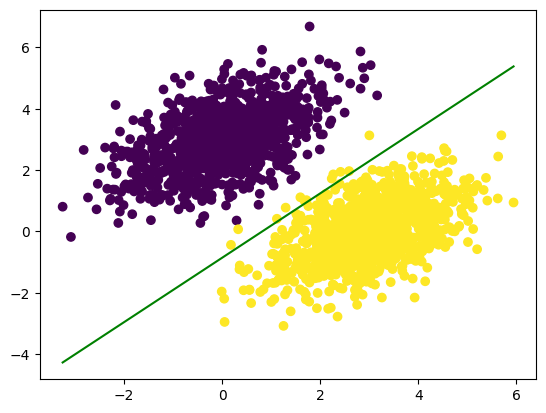

In [20]:
#Testing to find the linear classifier for the data
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

size = 1000
negative_classes = np.random.multivariate_normal([0,3], [[1,0.5],[0.5,1]], size)
positive_classes = np.random.multivariate_normal([3,0], [[1,0.5],[0.5,1]], size)

plt.scatter(negative_classes[:,0], negative_classes[:,1],c = 'orange')
plt.title('Negative Classes')
plt.show()
plt.scatter(positive_classes[:,0], positive_classes[:,1], c= 'green')
plt.title('Positive Classes')
plt.show()

inputs = np.vstack((negative_classes, positive_classes)).astype(np.float32)
targets = np.vstack((np.zeros((size, 1), dtype='float32'), np.ones((size, 1), dtype= 'float32')))
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:,0])
plt.title("Input data")
plt.show()

model = NaiveSequential([
    NaiveDense(input_size=2, output_size=1, activation=tf.nn.sigmoid),
])

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.binary_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

assert len(model.weights) == 2

fit(model, inputs, targets, epochs = 100, batch_size = 128)

W = model.weights[0]
b = model.weights[1]
predictions = model(inputs)
x_values = np.linspace(inputs[:, 0].min(), inputs[:, 0].max(), 100)
y_values = (-W[0]/W[1])*x_values + (0.5-b)/W[1]
plt.plot(x_values, y_values, "-g")
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)